In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

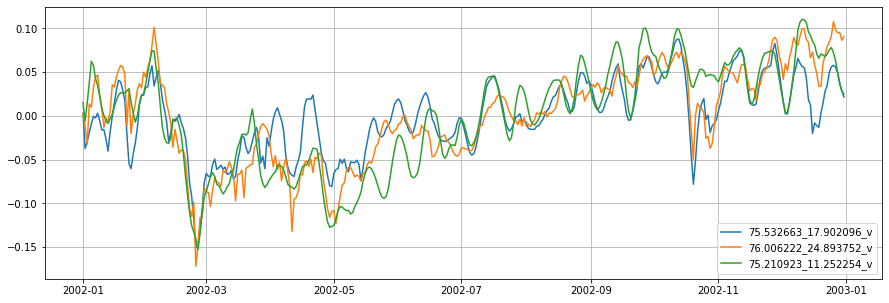

In [30]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_nemo.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%Y-%m-%d')
df_nemo['75.532663_17.902096_v']=df_nemo['75.532663_17.902096']-np.mean(df_nemo['75.532663_17.902096'])
df_nemo['76.006222_24.893752_v']=df_nemo['76.006222_24.893752']-np.mean(df_nemo['76.006222_24.893752'])
df_nemo['75.210923_11.252254_v']=df_nemo['75.210923_11.252254']-np.mean(df_nemo['75.210923_11.252254'])

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df_nemo['dates'], df_nemo['75.532663_17.902096_v'], label='75.532663_17.902096_v')
plt.plot(df_nemo['dates'], df_nemo['76.006222_24.893752_v'], label='76.006222_24.893752_v')
plt.plot(df_nemo['dates'], df_nemo['75.210923_11.252254_v'], label='75.210923_11.252254_v')
plt.legend()
plt.grid()
plt.show()

## Раскладываем временные ряды NEMO на составляющие

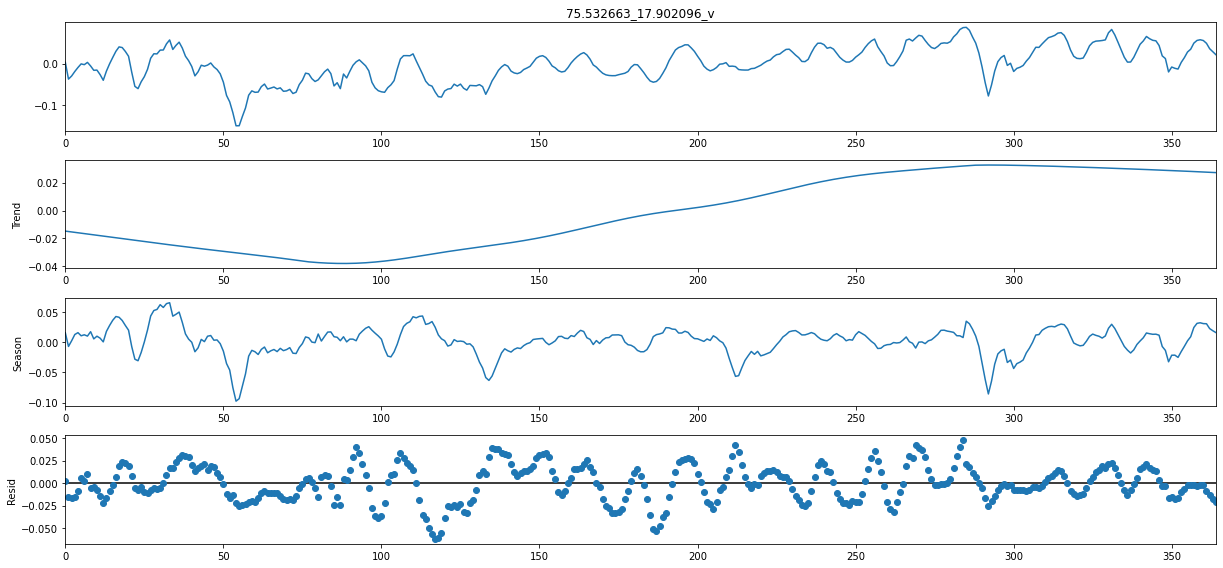

In [31]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['75.532663_17.902096_v'], period=80)
res = stl.fit()
fig = res.plot()

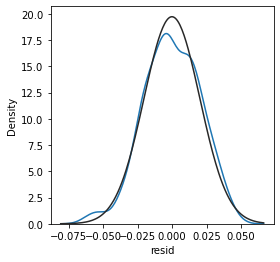

KstestResult(statistic=0.034893618930842085, pvalue=0.7521466414043669)


In [32]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

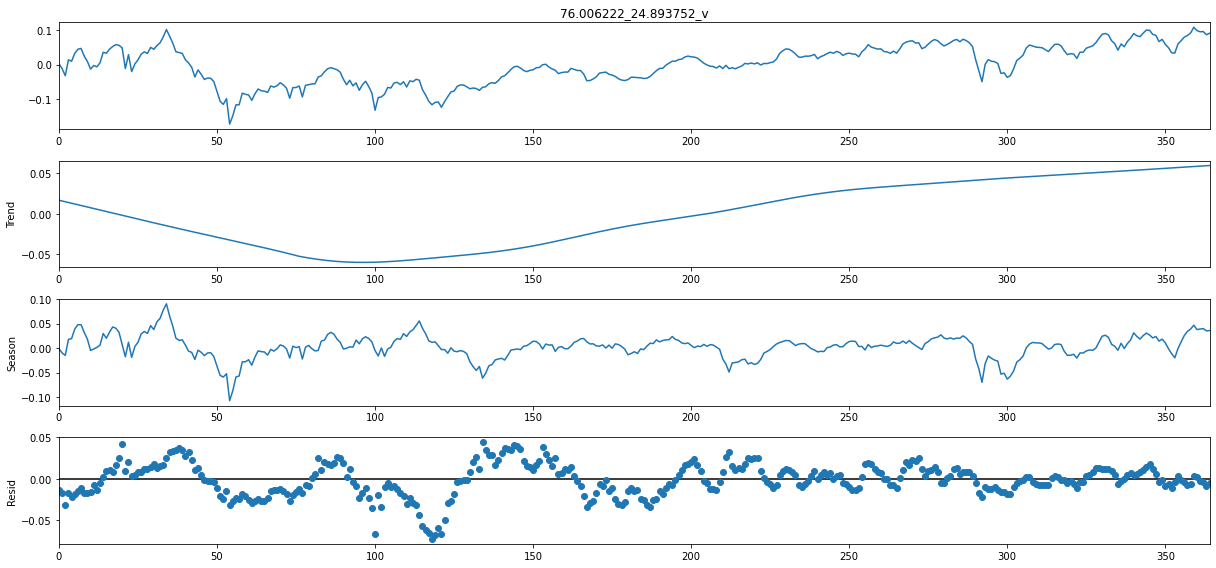

In [33]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['76.006222_24.893752_v'], period=80)
res = stl.fit()
fig = res.plot()

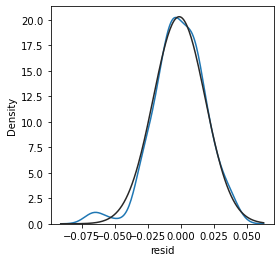

KstestResult(statistic=0.039571608498134514, pvalue=0.6027404559317637)


In [34]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

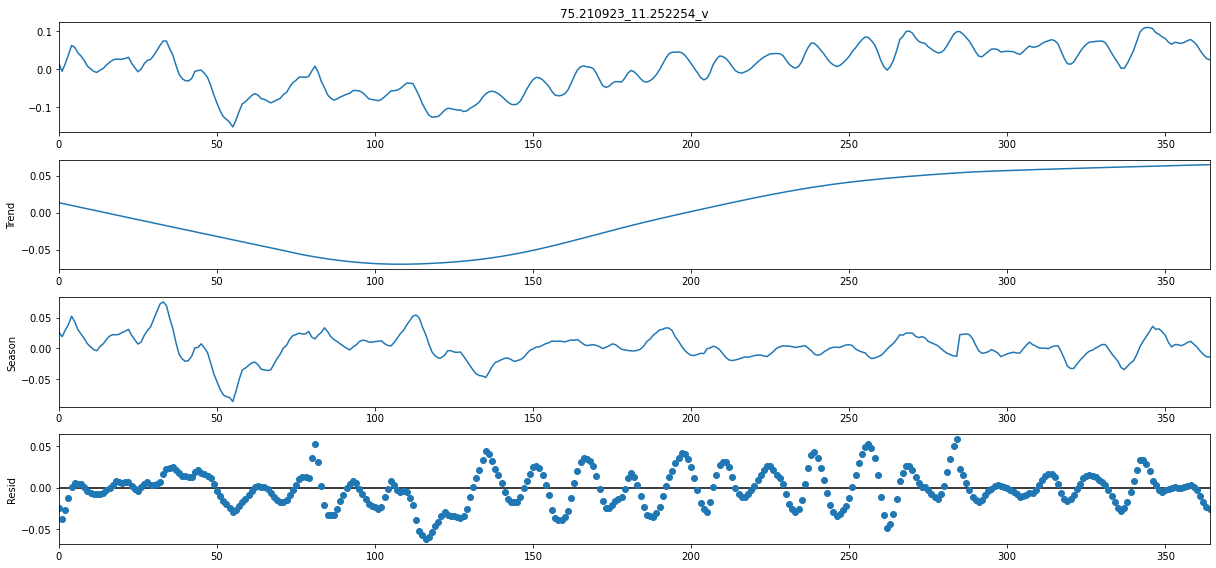

In [35]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_nemo['75.210923_11.252254_v'], period=80)
res = stl.fit()
fig = res.plot()

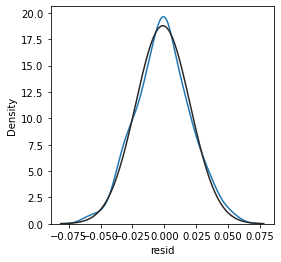

KstestResult(statistic=0.03545711398001117, pvalue=0.7345685665377324)


In [36]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)

## Считаем корреляции между реанализом и сглаженными данными NEMO 

In [37]:
import scipy.stats

In [38]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])

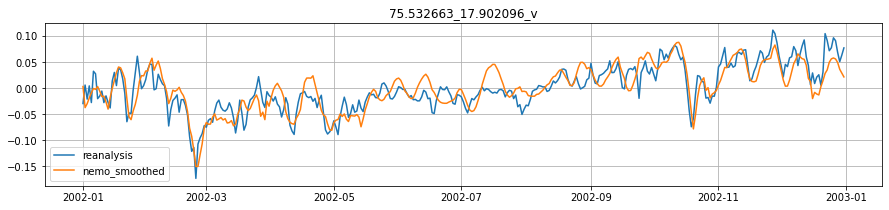

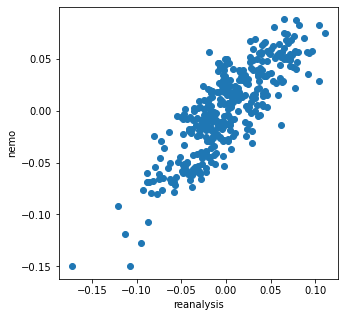

(0.8337037978841654, 1.214913745393327e-95)
SpearmanrResult(correlation=0.814175404653734, pvalue=1.0066651553522181e-87)
KendalltauResult(correlation=0.6206533192834561, pvalue=4.086633947533077e-70)


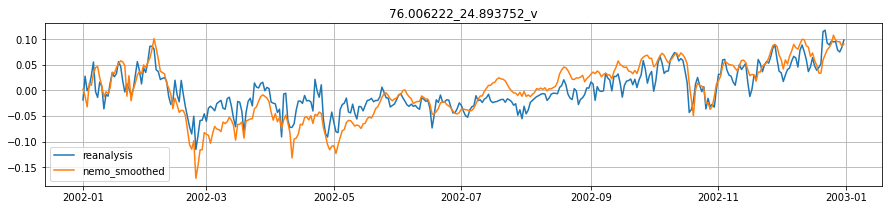

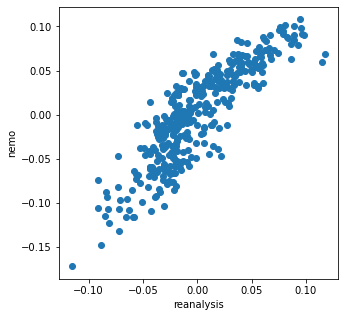

(0.8657899761665991, 3.4549176612526776e-111)
SpearmanrResult(correlation=0.8722204810684487, pvalue=8.633734313956505e-115)
KendalltauResult(correlation=0.6908625620954387, pvalue=1.9978109667807254e-86)


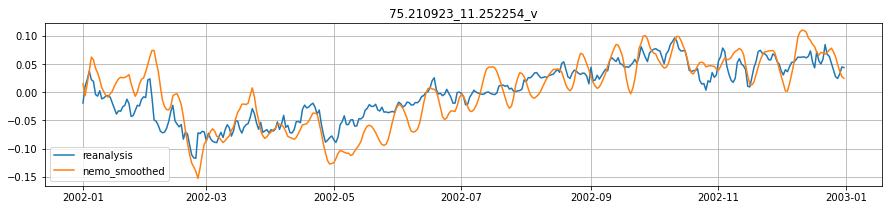

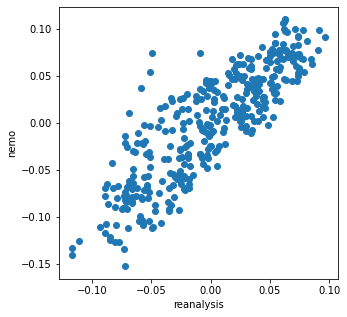

(0.8557421048805733, 6.437169453213136e-106)
SpearmanrResult(correlation=0.853779030311705, pvalue=6.189773167544946e-105)
KendalltauResult(correlation=0.6609965377088663, pvalue=2.8260036184869096e-79)


In [39]:
x_list=[df_rean['75.532663_17.902096_v'], df_rean['76.006222_24.893752_v'], df_rean['75.210923_11.252254_v']]
y_list=[df_nemo['75.532663_17.902096_v'], df_nemo['76.006222_24.893752_v'], df_nemo['75.210923_11.252254_v']]

for i in range(len(x_list)):    

    plt.rcParams['figure.figsize'] = [15, 3]
    plt.plot(df_rean['dates'], x_list[i], label='reanalysis')
    plt.plot(df_nemo['dates'], y_list[i], label='nemo_smoothed')
    plt.title(x_list[i].name)
    plt.legend()
    plt.grid()
    plt.show()

    plt.rcParams['figure.figsize'] = [5, 5]
    plt.scatter(x_list[i], y_list[i])
    plt.xlabel('reanalysis')
    plt.ylabel('nemo')
    plt.show()
    print(scipy.stats.pearsonr(x_list[i], y_list[i]))    # Pearson's r
    print(scipy.stats.spearmanr(x_list[i], y_list[i]))   # Spearman's rho
    print(scipy.stats.kendalltau(x_list[i], y_list[i]))  # Kendall's tau

***Корреляция положительная***

***Еще кажется, что расхождение как раз из-за различия в тренде, сравним и проверим:***

> Тренд плавает +-4см, незначительно, можно использовать

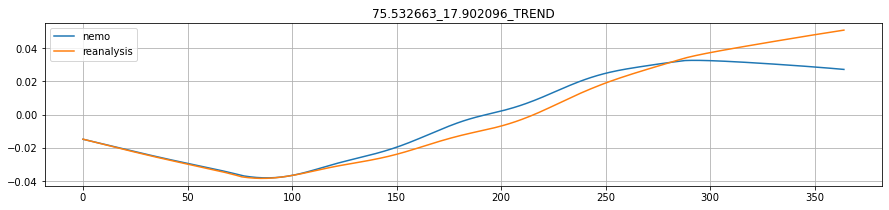

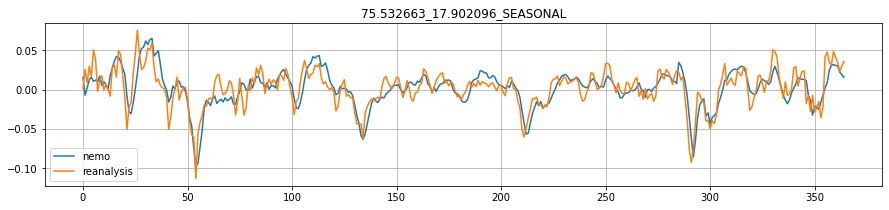

In [40]:
stl_n = STL(df_nemo['75.532663_17.902096_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['75.532663_17.902096_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('75.532663_17.902096_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('75.532663_17.902096_SEASONAL')
plt.grid()
plt.show()

df_nemo['75.532663_17.902096_no_res']=df_nemo['75.532663_17.902096_v']-res_n.resid
df_rean['75.532663_17.902096_no_res']=df_rean['75.532663_17.902096_v']-res_r.resid

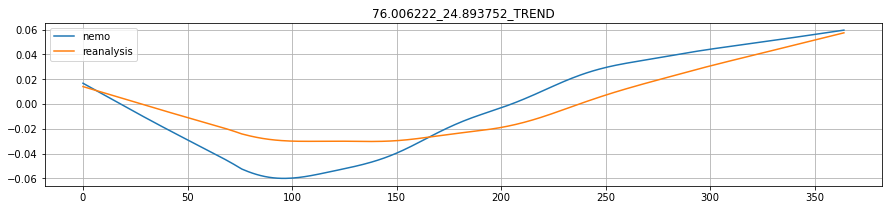

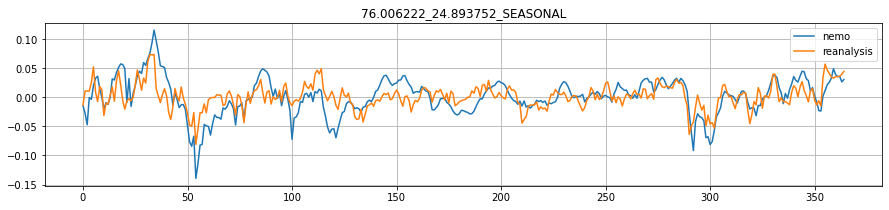

In [41]:
stl_n = STL(df_nemo['76.006222_24.893752_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['76.006222_24.893752_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('76.006222_24.893752_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal+res_n.resid, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('76.006222_24.893752_SEASONAL')
plt.grid()
plt.show()

df_nemo['76.006222_24.893752_no_res']=df_nemo['76.006222_24.893752_v']-res_n.resid
df_rean['76.006222_24.893752_no_res']=df_rean['76.006222_24.893752_v']-res_r.resid

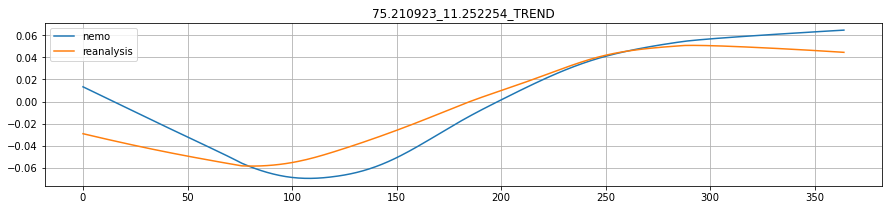

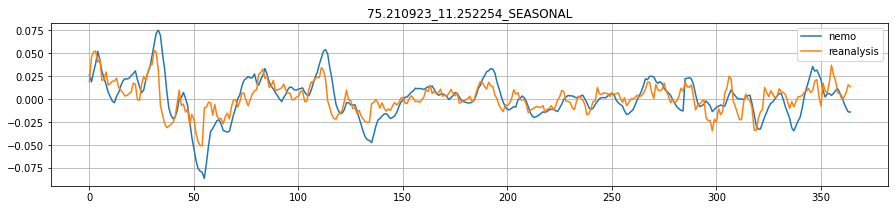

In [42]:
stl_n = STL(df_nemo['75.210923_11.252254_v'], period=80)
res_n = stl_n.fit()
stl_r = STL(df_rean['75.210923_11.252254_v'], period=80)
res_r = stl_r.fit()

plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(res_n.trend, label='nemo')
plt.plot(res_r.trend, label='reanalysis')
plt.legend()
plt.title('75.210923_11.252254_TREND')
plt.grid()
plt.show()

plt.plot(res_n.seasonal, label='nemo')
plt.plot(res_r.seasonal, label='reanalysis')
plt.legend()
plt.title('75.210923_11.252254_SEASONAL')
plt.grid()
plt.show()

df_nemo['75.210923_11.252254_no_res']=df_nemo['75.210923_11.252254_v']-res_n.resid
df_rean['75.210923_11.252254_no_res']=df_rean['75.210923_11.252254_v']-res_r.resid

# красиво то как для этой точки

### Таким образом, для всего реанализа остатки незначимые, отбрасываем их. Для NEMO остатки значимые только для точки 76.006222_24.893752. (При уровне значимости критерия Колмагорова-Смирнова 0.07)

In [43]:
df_nemo

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v,75.532663_17.902096_no_res,76.006222_24.893752_no_res,75.210923_11.252254_no_res
0,-0.866979,-0.890416,-0.945982,2002-01-01,0.003173,0.002300,0.015237,0.000649,0.015921,0.039857
1,-0.907407,-0.904165,-0.967084,2002-01-02,-0.037255,-0.011450,-0.005865,-0.022197,0.005843,0.031439
2,-0.899823,-0.924889,-0.946681,2002-01-03,-0.029671,-0.032174,0.014538,-0.013068,-0.000034,0.041030
3,-0.888992,-0.878961,-0.923555,2002-01-04,-0.018840,0.013754,0.037664,-0.003051,0.031553,0.049552
4,-0.879334,-0.882886,-0.898750,2002-01-05,-0.009182,0.009830,0.062469,-0.000307,0.032347,0.061937
...,...,...,...,...,...,...,...,...,...,...
360,-0.814204,-0.794452,-0.897989,2002-12-27,0.055948,0.098264,0.063230,0.058248,0.096439,0.066598
361,-0.820932,-0.797816,-0.911585,2002-12-28,0.049220,0.094900,0.049634,0.057909,0.097794,0.060128
362,-0.833964,-0.797317,-0.923432,2002-12-29,0.036189,0.095398,0.037787,0.049800,0.098922,0.054999
363,-0.841198,-0.806413,-0.933277,2002-12-30,0.028954,0.086303,0.027943,0.046149,0.094523,0.050788


In [44]:
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v,75.532663_17.902096_no_res,76.006222_24.893752_no_res,75.210923_11.252254_no_res
0,-0.467534,-0.481149,-0.501914,2002-01-01,-0.029398,-0.018687,-0.018977,-0.013280,0.001063,-0.010084
1,-0.432142,-0.434702,-0.472039,2002-01-02,0.005993,0.027760,0.010897,0.010740,0.024633,0.016268
2,-0.459114,-0.463210,-0.460948,2002-01-03,-0.020979,-0.000748,0.021989,-0.006476,0.024216,0.021616
3,-0.433765,-0.454657,-0.445413,2002-01-04,0.004370,0.007804,0.037524,0.014204,0.023459,0.022106
4,-0.465687,-0.433384,-0.460599,2002-01-05,-0.027551,0.029078,0.022338,0.000898,0.038281,0.009656
...,...,...,...,...,...,...,...,...,...,...
360,-0.347166,-0.367057,-0.455382,2002-12-27,0.090969,0.095405,0.027554,0.091435,0.091730,0.044835
361,-0.369520,-0.383776,-0.458292,2002-12-28,0.068616,0.078686,0.024645,0.084668,0.092024,0.047015
362,-0.387371,-0.387457,-0.450590,2002-12-29,0.050765,0.075005,0.032346,0.073522,0.092974,0.052002
363,-0.374828,-0.378650,-0.437877,2002-12-30,0.063308,0.083812,0.045059,0.080279,0.097116,0.060537


## Добавим к модели ARIMA модифицированные ряды NEMO в качестве экзогенного фактора

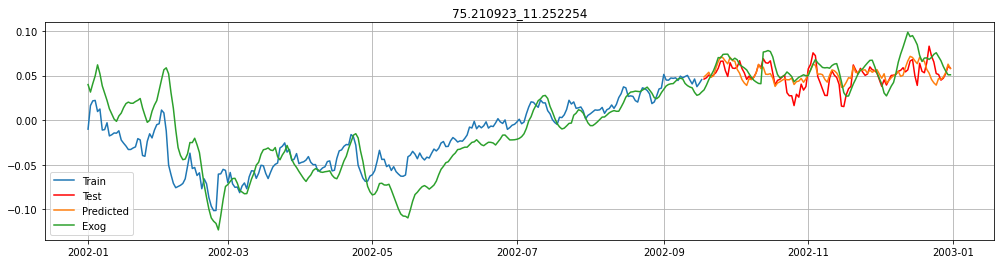

MSE =  0.00010482087132900092
MAE =  0.007688813495638526
MAPE =  19.538
R^2 =  0.35550540510914264


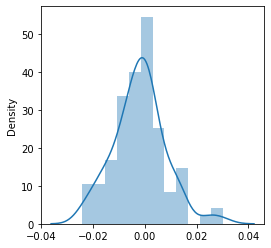

In [45]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

test = df_rean['75.210923_11.252254_no_res'][-105:]
test.index = df_rean['dates'][-105:]
train = df_rean['75.210923_11.252254_no_res'][:-105]
train.index = df_rean['dates'][:-105]
exog_train=df_nemo['75.210923_11.252254_no_res'][:-105]
exog_train.index = df_nemo['dates'][:-105]
exog_test=df_nemo['75.210923_11.252254_no_res'][-105:]
exog_test.index = df_nemo['dates'][-105:]

stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(105, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['75.210923_11.252254_no_res'], label='Exog')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

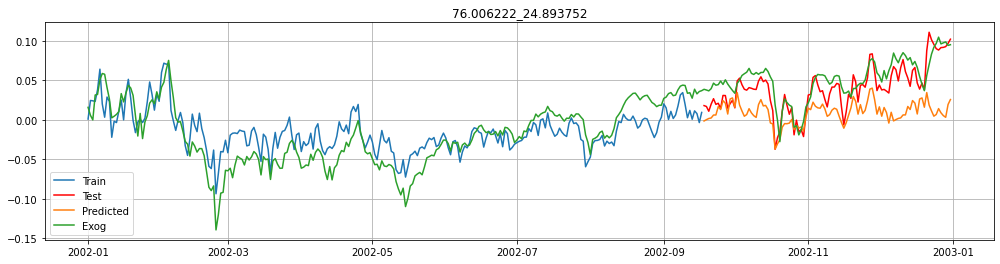

MSE =  0.0014752382715501704
MAE =  0.03087690240440808
MAPE =  47.245
R^2 =  -0.7195200673547701


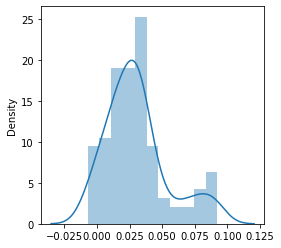

In [46]:
test = df_rean['76.006222_24.893752_no_res'][-105:]
test.index = df_rean['dates'][-105:]
train = df_rean['76.006222_24.893752_no_res'][:-105]
train.index = df_rean['dates'][:-105]
exog_train=df_nemo['76.006222_24.893752_no_res'][:-105]
exog_train.index = df_nemo['dates'][:-105]
exog_test=df_nemo['76.006222_24.893752_no_res'][-105:]
exog_test.index = df_nemo['dates'][-105:]

stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(105, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['76.006222_24.893752_no_res'], label='Exog')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

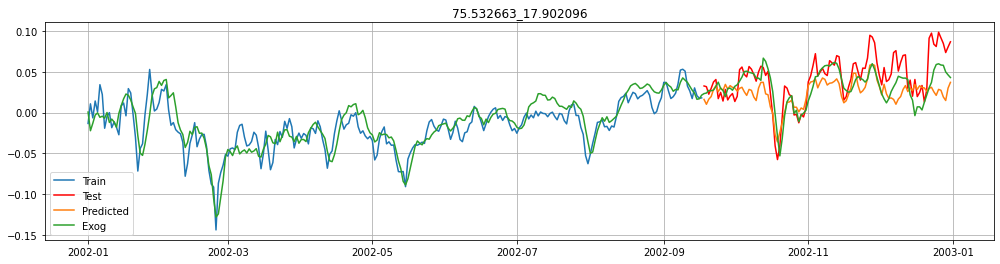

MSE =  0.0007534735790983108
MAE =  0.021726244653992522
MAPE =  26.661
R^2 =  0.1272797849905818


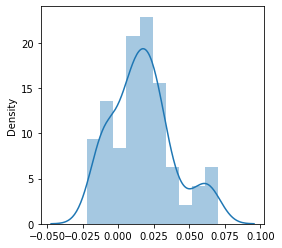

In [47]:
test = df_rean['75.532663_17.902096_no_res'][-105:]
test.index = df_rean['dates'][-105:]
train = df_rean['75.532663_17.902096_no_res'][:-105]
train.index = df_rean['dates'][:-105]
exog_train=df_nemo['75.532663_17.902096_no_res'][:-105]
exog_train.index = df_nemo['dates'][:-105]
exog_test=df_nemo['75.532663_17.902096_no_res'][-105:]
exog_test.index = df_nemo['dates'][-105:]

stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0), 'exog':exog_train})
model_res = stlf.fit()
forecasts = model_res.forecast(105, exog=exog_test)

plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(train, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.plot(df_nemo['dates'], df_nemo['75.532663_17.902096_no_res'], label='Exog')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

### Просто статистическая модель без экзогенного фактора даже немного лучше